<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 5 - Hanson Nguyen

# **20.1 Numerical Integration Problem Statement**


---

We can use numerical grids, or an evenly spaced set of points, defined over some domain to discretize functions. In doing so, differentiation and integration can be simplified into numerical methods. A parameter of generating numerical grids is the step size, or spacing between points.

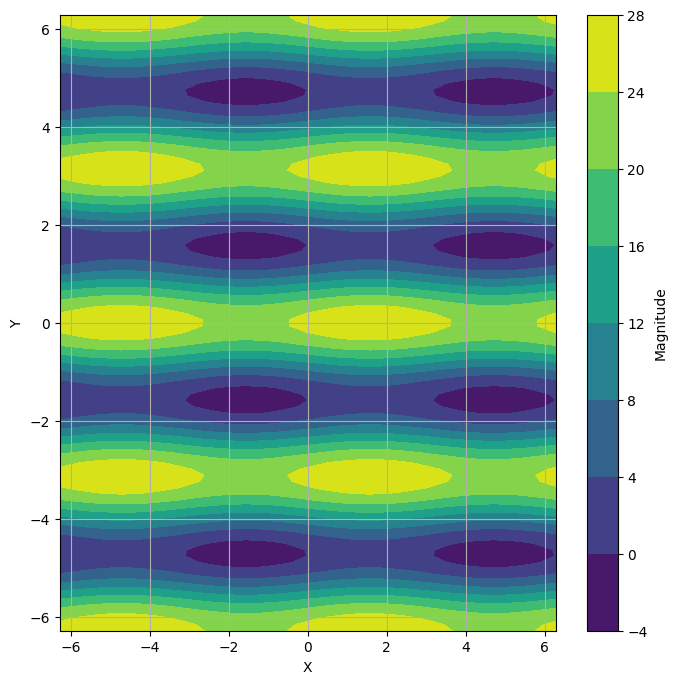

In [85]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X,Y = np.meshgrid(x,y)
Z = (2*np.sin(X)) + np.square((5*np.cos(Y)))


# Plot the numerical grid
plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# **20.2 Finite Differences Method**


---

Using the finite difference method, we can estimate derivatives in the neighborhood of a point $x = a$. The forward difference is $f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j}$, the backward difference is $f'(x_j) = \frac{f(x_{j}) - f(x_{j-1})}{ x_{j} - x_{j-1} }$, and the central difference is: $f'(x_{j-1}) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_{j-1}}$. The forward difference can be derived by a Taylor series expansion around $x_j$, neglecting higher order terms with $\mathcal{O}(h)$. In general, we can use a Taylor series expansion to get an accuracy of $\mathcal{O}(h^p)$, where $p$ is the order of accuracy.

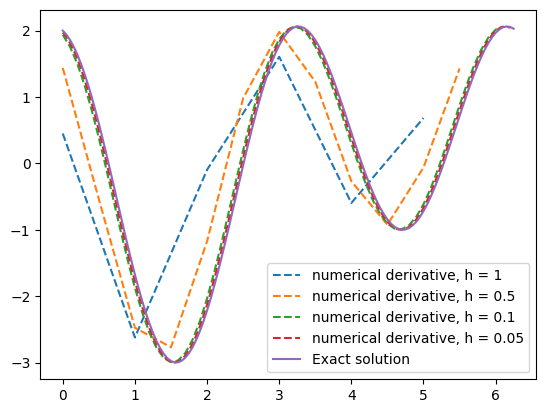

h = 1, error = 2.120126005608605
h = 0.5, error = 1.140086701140972
h = 0.1, error = 0.2358326474055708
h = 0.05, error = 0.11795436778118518


In [86]:
# numerically solve derivatives from https://pythonnumericalmethods.berkeley.edu/
# I demonstrate how decreasing the step sizes allows for better convergence to the actual derivative

h_list = [1, 0.5, 0.1, .05]
errors = []
for h in h_list:                  # define different step sizes
  x = np.arange(0, 2*np.pi, h)    # define grid
  y = np.cos(x) + np.sin(2*x)     # compute function

  # the derivative is (f(x + h) - f(x) / h)
  deriv = np.diff(y)/h            # numerically solved derivative


  plt.plot(x[:-1], deriv, '--', label = 'numerical derivative, h = ' + str(h))

  exact_solution = -np.sin(x) + 2*np.cos(2*x)   # analytically solved derivative
  errors.append(np.max(np.abs(exact_solution[:-1] - deriv)))

plt.plot(x, exact_solution,     label = 'Exact solution')
plt.legend()
plt.show()

for h, error in zip(h_list, errors):
  print(f'h = {h}, error = {error}')

# **20.3 Approximating of Higher Order Derivatives**


---
For higher order derivatives, we can use the expression look at larger distances around $f(x_j)$ and obtain a system of equations that give us the higher order derivative. For example, a second order derivative would be:
$f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}$, which is $\mathcal{O}(h^2)$

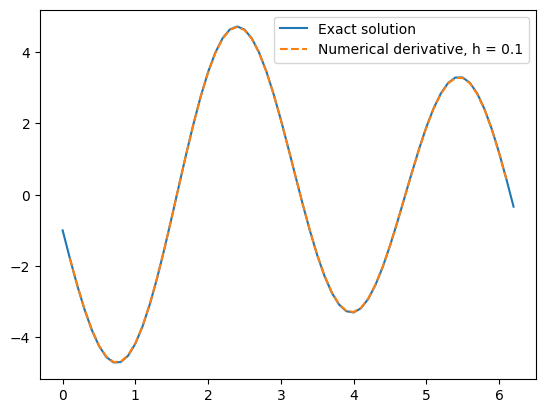

h = 0.1, error = 0.013890285959893944


In [87]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1  # grid spacing
x = np.arange(0, 2*np.pi, h)  # define grid
y = np.cos(x) + np.sin(2*x)   # compute function

# Compute the second derivative using central differences
sec_deriv = (y[2:] - 2*y[1:-1] + y[:-2]) / h**2
x_mid = x[1:-1]  # x values corresponding to the second derivative

# Compute the exact second derivative for comparison
exact_solution = -np.cos(x) - 4*np.sin(2*x)
exact_mid = exact_solution[1:-1]  # align with x_mid

plt.plot(x, exact_solution, label='Exact solution')
plt.plot(x_mid, sec_deriv, '--', label='Numerical derivative, h = ' + str(h))
plt.legend()
plt.show()

error = np.max(np.abs(exact_mid - sec_deriv))
print(f'h = {h}, error = {error}')

# **20.4 Numerical Differentiation with Noise**


---
Noise can be magnified when taking derivatives, numerically or analytically. For example given a function $f(x) = \cos(x)$ and $f(x,\omega) = \cos(x) + \epsilon \sin(\omega x)$, we might not notice the noise for a small $0 \leq \epsilon \leq 1$. However, when we take the derivative, we obtain $f'(x,w) = -\sin(x) = \omega\epsilon\cos(\omega\epsilon)$. If $\omega$ is large, then the noise is significant and can impact our results. We can show this both by looking the analytical and numerical results:\.  

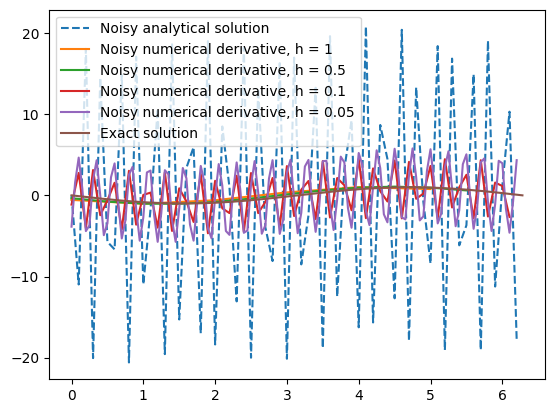

In [88]:

h_noise = [1, 0.5, 0.1, .05]

omega = 100
epsilon = 0.2

# The original function is y = np.cos(x). We are solving for y'

exact_solution_noisy = -np.sin(x) + omega*epsilon*np.sin(omega*x)   # analytically solved derivative
plt.plot(x, exact_solution_noisy, '--',  label = 'Noisy analytical solution')

for h in h_noise:                  # define different step sizes
  x = np.arange(0, 2*np.pi, h)    # define grid
  y = np.cos(x) + epsilon * np.sin(omega*x)     # compute function

  # the derivative is (f(x + h) - f(x) / h)
  deriv = np.diff(y)/h            # numerically solved derivative


  plt.plot(x[:-1], deriv, label = 'Noisy numerical derivative, h = ' + str(h))

# analytical results
h = 0.01
x = np.arange(0, 2*np.pi, h)    # define grid
y_noise = np.cos(x) + epsilon *np.sin(omega*x)     # compute function

exact_solution = -np.sin(x)   # analytically solved derivative



plt.plot(x, exact_solution,     label = 'Exact solution')
plt.legend()
plt.show()

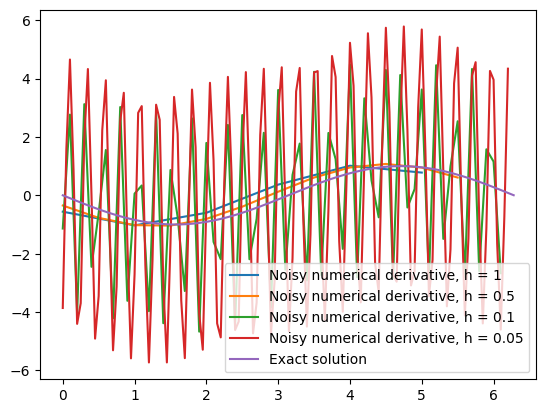

In [89]:
# Close up, with only the numerical solutions:


h_noise = [1, 0.5, 0.1, .05]

omega = 100
epsilon = 0.2

# The original function is y = np.cos(x). We are solving for y'

for h in h_noise:                  # define different step sizes
  x = np.arange(0, 2*np.pi, h)    # define grid
  y = np.cos(x) + epsilon * np.sin(omega*x)     # compute function

  # the derivative is (f(x + h) - f(x) / h)
  deriv = np.diff(y)/h            # numerically solved derivative


  plt.plot(x[:-1], deriv, label = 'Noisy numerical derivative, h = ' + str(h))

# analytical results
h = 0.01
x = np.arange(0, 2*np.pi, h)    # define grid
y_noise = np.cos(x) + epsilon *np.sin(omega*x)     # compute function

exact_solution = -np.sin(x)   # analytically solved derivative



plt.plot(x, exact_solution,     label = 'Exact solution')
plt.legend()
plt.show()

Interestingly enough, the larger steps help reduce and noise, since it is periodic at a faster frequency.